In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/heart - heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
df.dropna(inplace=True)

In [ ]:
X = df.drop('target', axis=1)
y = df['target']
print(X.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [ ]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
print(f"Data encoded. Total features: {X_encoded.shape[1]}")

Data encoded. Total features: 30


In [1]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=0, stratify=y)
print(f"Data split: Training set size = {len(X_train)}, Testing set size = {len(X_test)}")

NameError: name 'train_test_split' is not defined

In [ ]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])
print("Preprocessing (OHE and Scaling) complete. Use 'X_train_scaled' and 'X_test_scaled' for model training.")

Preprocessing (OHE and Scaling) complete. Use 'X_train_scaled' and 'X_test_scaled' for model training.


In [ ]:
print("\n--- 2. Model Training and Evaluation ---")
models = {
    'K-Nearest Neighbors (k=7)': KNeighborsClassifier(n_neighbors=7),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=0),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0)
}

results = {}
best_accuracy = 0
best_model_name = ""
best_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


--- 2. Model Training and Evaluation ---

--- K-Nearest Neighbors (k=7) ---
Accuracy: 0.6711
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        35
           1       0.69      0.71      0.70        41

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.67      0.67      0.67        76



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Logistic Regression ---
Accuracy: 0.8816
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.85      0.95      0.90        41

    accuracy                           0.88        76
   macro avg       0.89      0.88      0.88        76
weighted avg       0.89      0.88      0.88        76


--- Naive Bayes ---
Accuracy: 0.8684
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76


--- Decision Tree ---
Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.76      0.78      0.77 

In [ ]:
print("\n--- 3. Best Model Selection and Serialization ---")
print("Model Accuracy Comparison:")
print("--------------------------")
for name, acc in results.items():
    print(f"{name:<30}: {acc:.4f}")

print(f"\nThe Final Model selected is {best_model_name} with an accuracy of {best_accuracy:.4f}.")


--- 3. Best Model Selection and Serialization ---
Model Accuracy Comparison:
--------------------------
K-Nearest Neighbors (k=7)     : 0.6711
Logistic Regression           : 0.8816
Naive Bayes                   : 0.8684
Decision Tree                 : 0.7500
Random Forest                 : 0.8158

The Final Model selected is Logistic Regression with an accuracy of 0.8816.


/tmp/ipython-input-3253923077.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(



Model Accuracy Comparison chart saved as 'model_accuracy_comparison.png'.


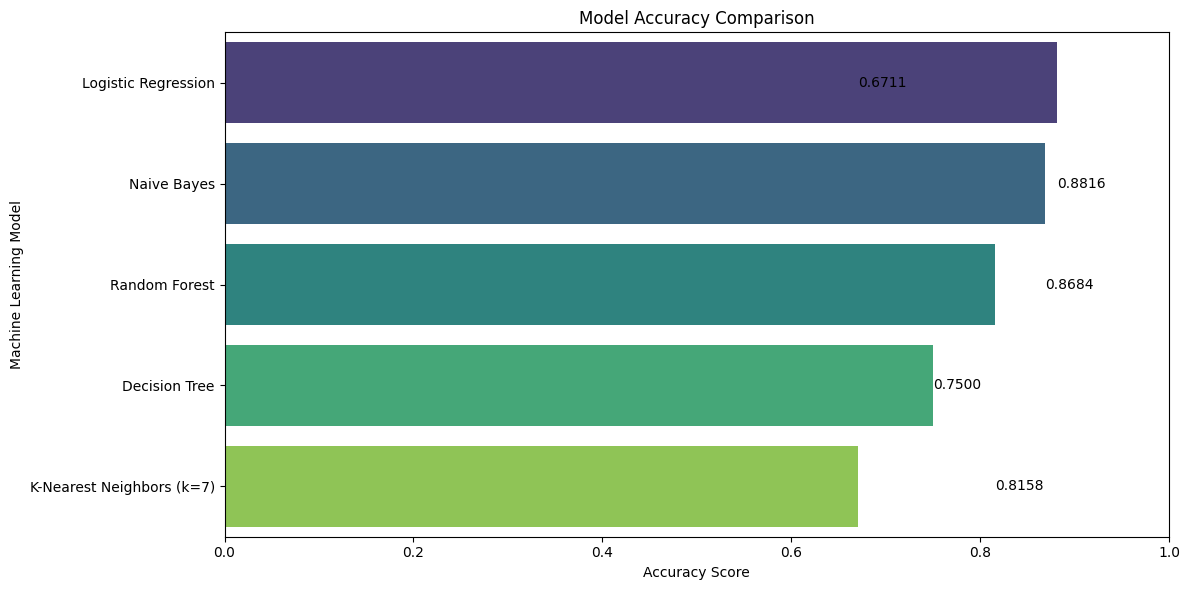

In [ ]:
accuracy_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Accuracy',
    y='Model',
    data=accuracy_df,
    palette='viridis'
)
for index, row in accuracy_df.iterrows():
    barplot.text(
        row.Accuracy,
        index,
        f'{row.Accuracy:.4f}',
        color='black',
        ha="left",
        va='center',
        fontsize=10
    )
plt.xlim(0, 1.0)
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Machine Learning Model')
plt.tight_layout()
plt.savefig('model_accuracy_comparison.png')
print("\nModel Accuracy Comparison chart saved as 'model_accuracy_comparison.png'.")

In [ ]:
rf_model = models['Random Forest']

In [ ]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_scaled.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)


In [ ]:
df_importance = feature_importances_sorted.reset_index()
df_importance.columns = ['Features', 'Importance Score']

/tmp/ipython-input-3539513439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance Score', y='Features', data=df_importance, palette='magma')


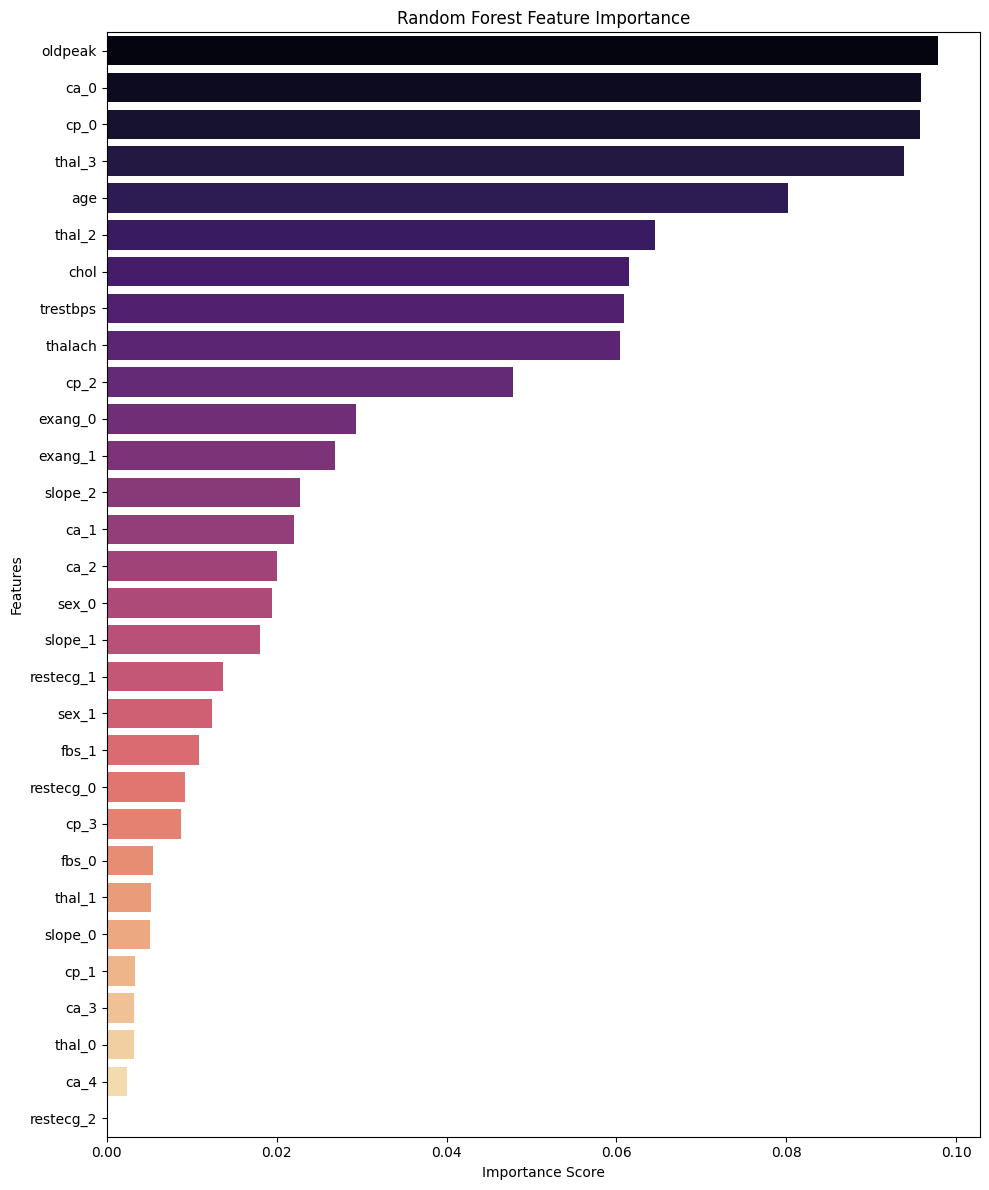

In [ ]:
plt.figure(figsize=(10, len(df_importance) * 0.4))
sns.barplot(x='Importance Score', y='Features', data=df_importance, palette='magma')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
print("\nRandom Forest (Best Model) Confusion Matrix:")
rf_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
print(rf_conf_matrix)


Random Forest (Best Model) Confusion Matrix:
[[28  7]
 [ 2 39]]
